In [153]:
import pandas as pd

heart_ml = pd.read_csv("data/processed_heart_info.csv")
heart_ml

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.295455,1,0,0,1,0,0,1,0
1,0.428571,0,0.80,0.298507,0,0.676056,0,0.409091,0,1,0,1,0,1,0,1
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.295455,1,0,0,0,1,0,1,0
3,0.408163,0,0.69,0.354892,0,0.338028,1,0.465909,0,0,0,1,0,1,0,1
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.295455,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,0.55,0.437811,0,0.507042,0,0.431818,0,0,1,1,0,1,0,1
914,0.816327,1,0.72,0.320066,1,0.570423,0,0.681818,0,0,0,1,0,1,0,1
915,0.591837,1,0.65,0.217247,0,0.387324,1,0.431818,0,0,0,1,0,1,0,1
916,0.591837,0,0.65,0.391376,0,0.802817,0,0.295455,1,0,0,0,0,1,0,1


In [154]:
from sklearn.model_selection import train_test_split
X = heart_ml.drop(['HeartDisease'],axis=1).values
y = heart_ml['HeartDisease'].values

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

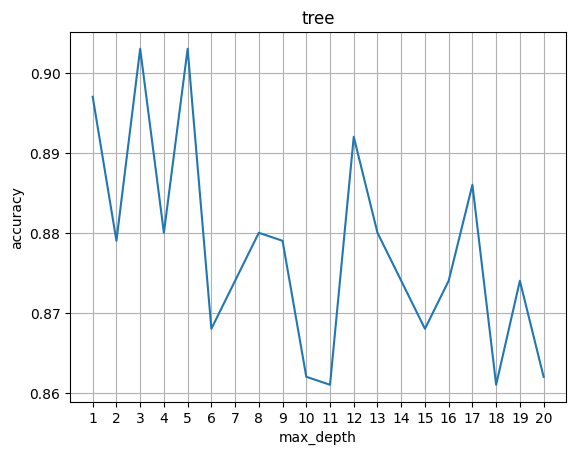

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator

depth = []
acc_d = []
for i in range(1,21):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_train, y_train)
    depth.append(i)
    acc_d.append(round(float(cross_val_score(tree, X_val, y_val, cv=10).mean()), 3))

plt.plot(depth, acc_d)
plt.title('tree')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.grid(True)
plt.show()

In [156]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(X_train, y_train)

train_accuracy = tree.score(X_train, y_train)

train_accuracy

0.8818181818181818

In [157]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(tree, X_val, y_val, cv=10).mean())

0.8911764705882353


In [158]:
test_accuracy = tree.score(X_test, y_test)
test_accuracy

0.8586956521739131

In [159]:
from sklearn.metrics import classification_report
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        51

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



In [160]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("AUC:", auc_score)

AUC: 0.8582018173122907


In [161]:
import joblib
joblib.dump(tree, 'models/tree.pkl')

['models/tree.pkl']